# IMPUTACIÓN DE VALORES AUSENTES

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Instalamos libreria para poder abrir el archivo .xls
!pip install openpyxl

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#Visualizamos los 10 primeros datos de nuestro data frame
df = pd.read_excel("Datos para trabajo Imputación Valores Ausentes 1.xlsx", sheet_name= 'censUS')
df.head(10)

,Id,Edad,Años_Estudio,Salario,Escolaridad,Estado_Civil,Trabajo,Papel_Hogar,Género,País_Nacim
0,1,15.0,2.0,214061.0,HS-grad,Divorced,Adm-clerical,Not-in-family,Male,Cambodia
1,2,18.0,3.0,270942.0,5th-6th,Never-married,Other-service,Other-relative,Female,United-States
2,3,20.0,4.0,168807.0,7th-8th,Never-married,Craft-repair,Not-in-family,Female,United-States
3,4,14.0,4.0,168203.0,7th-8th,Never-married,Farming-fishing,Other-relative,Male,United-States
4,5,20.0,4.0,1484705.0,Some-college,Divorced,Exec-managerial,Unmarried,Male,United-States
5,6,21.0,16.0,1455435.0,Assoc-acdm,Separated,Craft-repair,NaN,Male,United-States
6,7,27.0,7.0,19752.0,11th,Never-married,Other-service,Own-child,Male,United-States
7,8,27.0,9.0,24090.0,HS-grad,Never-married,Exec-managerial,Own-child,Male,United-States
8,9,27.0,6.0,25051.0,10th,Never-married,Other-service,Own-child,Female,United-States
9,10,27.0,NaN,25690.0,10th,Never-married,Other-service,Own-child,Male,United-States


In [3]:
#Medidas del dataset
df.shape  

(30162, 10)

In [4]:
#Cantidad de datos ausentes por culumna
df.isna().sum()  

Id                 0
Edad            2010
Años_Estudio    3016
Salario         2513
Escolaridad        0
Estado_Civil    1508
Trabajo            0
Papel_Hogar     5027
Género             0
País_Nacim         0
dtype: int64

### Usaremos únicamente las columnas que tienen valores faltantes para realizar la imputación

In [5]:
#Definimos un nuevo data frame con las columnas que contienen valores ausentes 
df_ausentes = df.drop(['Escolaridad','Trabajo','Género','País_Nacim'], axis=1)
df_ausentes.head()

,Id,Edad,Años_Estudio,Salario,Estado_Civil,Papel_Hogar
0,1,15.0,2.0,214061.0,Divorced,Not-in-family
1,2,18.0,3.0,270942.0,Never-married,Other-relative
2,3,20.0,4.0,168807.0,Never-married,Not-in-family
3,4,14.0,4.0,168203.0,Never-married,Other-relative
4,5,20.0,4.0,1484705.0,Divorced,Unmarried


**El ID no fue eliminado para poder unir los datasets al final**

In [6]:
#Los tipos de datos son correctos y podemos trabajar con ellos
df_ausentes.dtypes  

Id                int64
Edad            float64
Años_Estudio    float64
Salario         float64
Estado_Civil     object
Papel_Hogar      object
dtype: object

**Ahora, vamos a verificar, de acuerdo a los lineamientos, si podemos realizar la imputacion con la MEDIA, MEDIANA o MODA.**

Para poder imputar valores ausentes utilizando la **MEDIA** se debe cumplir que:
- No puede usarse con variables categóricas; analizaremos la columna Edad, Años_Estudio y Salario.
- Sólo se recomienda para % faltantes hasta 10% y sin presencia de Outliers

Vemamos que el porcentaje de datos ausentes de las variables numéricas no supere el 10%:

In [7]:
#Porcentaje de nulos
df_ausentes[['Edad', 'Años_Estudio', 'Salario']].isnull().sum()/len(df_ausentes)*100 

Edad            6.664014
Años_Estudio    9.999337
Salario         8.331676
dtype: float64

Ahora vamos a verificar que no hayan outliers en las variables:

<AxesSubplot:xlabel='Edad'>

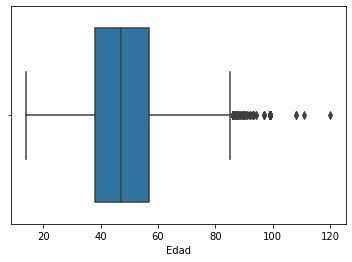

In [8]:
#Outliers Edad
sns.boxplot(x=df_ausentes['Edad'])

<AxesSubplot:xlabel='Años_Estudio'>

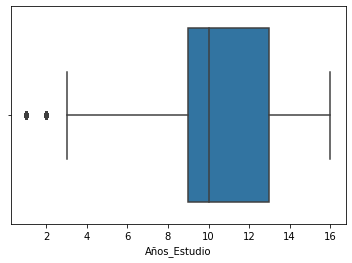

In [9]:
#Outliers Años_Estudio
sns.boxplot(x=df_ausentes['Años_Estudio'])

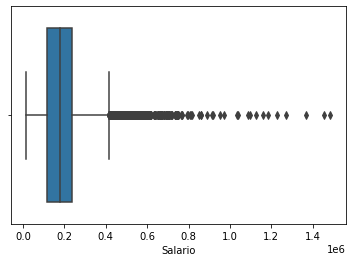

In [10]:
#Outliers Salario
ax = sns.boxplot(x=df_ausentes['Salario'])

**La edad, los años de estudio y el salario contienen outliers, por lo que no podremos imputar los valores ausentes con la MEDIA.**

Ahora, para poder imputar valores ausentes utilizando la **MEDIANA** se debe cumplir que:
- No puede usarse con variables categóricas; analizaremos la columna Edad, Años_Estudio y Salario.
- Sólo se recomienda para % faltantes hasta 10%.
- Al no ser afectada por valores extremos, ofrece mayor robustez.


Como el pocentaje de datos faltantes en las variables númericas es menor al 10% y existen outliers, procederemos a imputar con la **MEDIANA**.

In [11]:
#Agregamos al data frame los valores imputados
df_ausentes[['Edad', 'Años_Estudio', 'Salario']] = df_ausentes[['Edad', 'Años_Estudio', 'Salario']].fillna(df_ausentes.median())

C:\Users\david\AppData\Local\Temp/ipykernel_18716/1438074741.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ausentes[['Edad', 'Años_Estudio', 'Salario']] = df_ausentes[['Edad', 'Años_Estudio', 'Salario']].fillna(df_ausentes.median())


In [12]:
#Verificamos que efectivamente ya no hay datos ausentes en las variables
df_ausentes.isna().sum()

Id                 0
Edad               0
Años_Estudio       0
Salario            0
Estado_Civil    1508
Papel_Hogar     5027
dtype: int64

**Los valores ausentes fueron reemplazdos por las siguientes MEDIANAS:**

In [13]:
#Medianas de las variables
df_ausentes[['Años_Estudio','Salario','Edad']].median()

Años_Estudio        10.0
Salario         178649.0
Edad                47.0
dtype: float64

### Ahora debemos imputar los valores de las columnas faltantes:
#### Variables categóricas (Estado_Civil y Papel_Hogar)

Para poder imputar valores ausentes de variables categóricas podemos utiliar la **MODA**; para utilizarla se debe cumplir que:
- Sólo se recomienda para % faltantes hasta 10%.

Vemamos que el porcentaje de datos ausentes en las variables categóricas no supere el 10%:

In [14]:
#Porcentaje de nulos
df_ausentes[['Estado_Civil', 'Papel_Hogar']].isnull().sum()/len(df_ausentes)*100 

Estado_Civil     4.999668
Papel_Hogar     16.666667
dtype: float64

Como el porcentaje de datos ausentes de la variable Estado_Civil no supera el 10%, podemos importar la variable con la moda

**La variable Papel_Hogar supera el 10% de datos ausentes, por lo que no será posible realizar una imputación.**

In [15]:
#Agregamos al data frame los valores imputados
df_ausentes['Estado_Civil'] = df_ausentes[['Estado_Civil']].fillna(df_ausentes['Estado_Civil'].mode()[0])

In [16]:
#Verificamos que efectivamente ya no hay datos ausentes en las variables 
df_ausentes.isna().sum()

Id                 0
Edad               0
Años_Estudio       0
Salario            0
Estado_Civil       0
Papel_Hogar     5027
dtype: int64

**Los valores ausentes fueron reemplazdos por la MODA:**

In [17]:
#Moda de la variable
df_ausentes['Estado_Civil'].mode()

0     Married-civ-spouse
dtype: object

##### Ahora solo faltaría cambiar las columnas con los valores imputados en el DataFrame original:

In [32]:
df[['Edad', 'Años_Estudio', 'Salario', 'Estado_Civil']] = df_ausentes[['Edad', 'Años_Estudio', 'Salario', 'Estado_Civil']].values

In [35]:
df.head()

,Id,Edad,Años_Estudio,Salario,Escolaridad,Estado_Civil,Trabajo,Papel_Hogar,Género,País_Nacim
0,1,15.0,2.0,214061.0,HS-grad,Divorced,Adm-clerical,Not-in-family,Male,Cambodia
1,2,18.0,3.0,270942.0,5th-6th,Never-married,Other-service,Other-relative,Female,United-States
2,3,20.0,4.0,168807.0,7th-8th,Never-married,Craft-repair,Not-in-family,Female,United-States
3,4,14.0,4.0,168203.0,7th-8th,Never-married,Farming-fishing,Other-relative,Male,United-States
4,5,20.0,4.0,1484705.0,Some-college,Divorced,Exec-managerial,Unmarried,Male,United-States


In [34]:
# Vemos que únicamente quedan valores faltantes en Papel_Hogar, ya que no cumple con los criterios de imputación
df.isna().sum()

Id                 0
Edad               0
Años_Estudio       0
Salario            0
Escolaridad        0
Estado_Civil       0
Trabajo            0
Papel_Hogar     5027
Género             0
País_Nacim         0
dtype: int64

Procedemos a exportar el dataset resultante

In [38]:
df.to_excel('ValoresAusentes_imputados.xlsx', sheet_name='Imputados')